# "A Complete Catalog Of Every Time Someone Cursed Or Bled Out In A Quentin Tarantino Movie"

autor: Magdalena Kudrycka, grupa I5, 132263

### Quentin Tarantino to twórca, który słynie z brutalnych i wulgarnych filmów.
 W celu zobrazowania mającej to potwierdzać tezy zebrano siedem jego najpopularniejszych filmów: "Reservoir Dogs", 
"Kill Bill vol. 1", "Kill Bill vol. 2", "Inglorious Basterds", "Django Unchained" oraz "Jackie Brown" 
i zbadano sumaryczną ilość przekleństw i śmierci, przypadających na każdy z nich. 

Dane pobrano spod linku: https://github.com/fivethirtyeight/data/tree/master/tarantino 

Bazowano je na artykule z: https://fivethirtyeight.com/features/complete-catalog-curses-deaths-quentin-tarantino-films/

Sporą trudnością w odczycie tych danych okazało się przemieszanie rekordów dotyczących ekranowych śmierci razem z tymi o przekleństwach. Do tego, jedynym rozróżnieniem analizowanych filmów był wpis w pierwszej kolumnie, co też bywało problematyczne. Część zastosowanych tutaj rozwiązań musiało zostać z tego powodu trochę przekomplikowanych. Dla uproszczenia odczytu danych powstał schemat:

## Analiza danych

Na początek możemy sprawdzić, w którym filmie przekleństwo padło po raz pierwszy. Do tego potrzebujemy załadować plik, zawierający wszystkie dane:

In [1]:
MyData <- read.csv(file = "tarantino.csv", header = TRUE, sep = ",")

Aby w rezultacie uzyskać tytuł filmu, czas i słowo, trzeba zastosować funkcję:

In [2]:
min_temp <- 100
for (row in 1:nrow(MyData))
    {   
            if (MyData[row,2] == 'word')
                {
                    if (MyData[row,4] < min_temp)
                        {
                        min_temp <- MyData[row,4]
                        min_min <- MyData[row,]
                    }
        }
                
    }
print(min_min)

           movie type word minutes_in
1 Reservoir Dogs word dick        0.4


Z tego wynika, że filmem, w którym pada pierwsze przekleństwo jest "Reservoir Dogs".

W analogiczny sposób można sprawdzić dane dotyczące pierwszej śmierci wśród analizowanych tu filmów.

In [3]:
min_temp <- 100
for (row in 1:nrow(MyData))
    {   
            if (MyData[row,2] == 'death')
                {
                    if (MyData[row,4] < min_temp)
                        {
                        min_temp <- MyData[row,4]
                        min_min <- MyData[row,]
                    }
        }
                
    }
print(min_min)

                movie  type word minutes_in
1215 Django Unchained death            7.75


Pierwsza ekranowa śmierć pojawiła się z kolei w "Django Unchained".

Pojedyncza wartość niestety nie mówi zbyt wiele o całym zbiorze danych - zwłaszcza że bierzemy tu pod uwagę siedem różnych filmów, prawie każdy o odrębnej tematyce. Warto z tego powodu przeanalizować również to, kiedy pierwsze przekleństwo wystąpiło w każdym z omawianych filmów.

In [4]:
#funkcja sprawdzajaca pierwsze przeklenstwo, ktora przechowuje rowniez dane o filmie

first_curses <- function (data, key)
    {
    counter <- 0
    min_temp <- 100
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "word")
            {
            if (data[row, 4] < min_temp)
                {
                min_temp <- data[row, 4]
                min_time <- data[row,]
            }
        }
    }
    min_time                #data frame
}

In [5]:
#laczenie wszystkich ramek z danymi w jedna, wieksza ramke
first_curse <-rbind(first_curses(MyData[1:431,], 2),
                    first_curses(MyData[432:907,],2), 
                    first_curses(MyData[908:1027,], 2),
                    first_curses(MyData[1028:1107,],2),
                    first_curses(MyData[1108:1213,], 2),
                    first_curses(MyData[1214:1522,],2),
                    first_curses(MyData[1523:1894,], 2))

Teraz wystarczy tylko zastosować funkcję.

In [6]:
first_curse

,movie,type,word,minutes_in
1,Reservoir Dogs,word,dick,0.40
432,Pulp Fiction,word,shit,0.52
908,Kill Bill: Vol. 1,word,bitch,7.12
1028,Kill Bill: Vol. 2,word,hell,1.18
1112,Inglorious Basterds,word,hell,22.20
1214,Django Unchained,word,goddamn,7.23
1523,Jackie Brown,word,ass,4.38


Jak widać na przedstawionej tabeli, czas występowania pierwszego przekleństwa jest bardzo zróżnicowany. W przypadku "Reservoir Dogs" i "Pulp Fiction" wypada ono jeszcze przed pierwszą minutą trwania filmu, ale na przykład w "Inglorious Basterds" jest to dopiero dwudziesta druga minuta.

W ten sam sposób sprawdzamy dane o pierwszej ekranowej śmierci.

In [7]:
first_deaths <- function (data, key)
    {
    counter <- 0
    min_temp <- 100
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "death")
            {
            if (data[row, 4] < min_temp)
                {
                min_temp <- data[row, 4]
                min_time <- data[row,]
            }
        }
    }
    min_time
}

In [8]:
first_death <-rbind(first_deaths(MyData[1:431,], 2),
                    first_deaths(MyData[432:907,],2), 
                    first_deaths(MyData[908:1027,], 2),
                    first_deaths(MyData[1028:1107,],2),
                    first_deaths(MyData[1108:1213,], 2),
                    first_deaths(MyData[1214:1522,],2),
                    first_deaths(MyData[1523:1894,], 2))

Po zastosowaniu funkcji rysuje się tabela:

In [9]:
first_death

,movie,type,word,minutes_in
269,Reservoir Dogs,death,,59.93
499,Pulp Fiction,death,,18.70
926,Kill Bill: Vol. 1,death,,13.53
1034,Kill Bill: Vol. 2,death,,14.38
1108,Inglorious Basterds,death,,20.35
1215,Django Unchained,death,,7.75
1626,Jackie Brown,death,,23.08


W większości omawianych tu dzieł pierwsza śmierć przypada pomiędzy trzynastą a dwudziestą pierwszą minutą filmu. W "Django Unchained", jak to już zostało wcześniej policzone, jest to niecała ósma minuta, natomiast pierwszą ekranową śmierć w "Reservoir Dogs" można zobaczyć dopiero po upływie niemal godziny.

W przypadku przekleństw, zebrane dane informują także o tym, jakie konkretnie jest to słowo. Sprawdzenie najczęściej powtarzającego przekleństwa jest więc bardzo proste i wymaga zastosowania jednej komendy:

In [10]:
head(sort(summary(MyData$word), T), 1)

fucking 
    407

Z tego wynika, że najczęściej padało słowo "fucking", bo aż 407 razy.

Na wcześniej rysowanych tabelach widać było znaczące różnice w czasie występowania zarówno pierwszego przekleństwa, jak i pierwszej śmierci w omawianych filmach. Można się więc spodziewać, że niektóre dzieła Tarantino są bardziej wulgarne lub krwawe od innych. Aby sprawdzić, który film zawiera najwięcej przekleństw trzeba zastosować funkcję:

In [11]:
counting_words <- function (data, key)
    {
    counter <- 0
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "word")
            {
            counter <- counter + 1
        }
    }
    return(data.frame(data[1,1], counter))    #znowu data frame
}

In [12]:
all_words <- rbind(counting_words(MyData[1:431,], 2),
                   counting_words(MyData[432:907,],2), 
                   counting_words(MyData[908:1027,], 2),
                   counting_words(MyData[1028:1107,],2),
                   counting_words(MyData[1108:1213,], 2),
                   counting_words(MyData[1214:1522,],2),
                   counting_words(MyData[1523:1894,], 2))

Do sprawdzenia danych dotyczących najbardziej wulgarnego z omawianych tu filmów służy poniższa komenda:

In [13]:
all_words[which.max(all_words$counter),]

,data.1..1.,counter
2,Pulp Fiction,469


Z wprowadzonych danych wynika, że jest to "Pulp Fiction", które osiągnęło zawrotną liczbę 469 przekleństw na cały film.

Analogicznie poszukujemy najbardziej brutalnego filmu:

In [14]:
counting_deaths <- function (data, key)
    {
    counter <- 0
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "death")
            {
            counter <- counter + 1
        }
    }
    return(data.frame(data[1,1], counter))
}

In [15]:
all_deaths <- rbind(counting_deaths(MyData[1:431,], 2),
                    counting_deaths(MyData[432:907,],2), 
                    counting_deaths(MyData[908:1027,], 2),
                    counting_deaths(MyData[1028:1107,],2),
                    counting_deaths(MyData[1108:1213,], 2),
                    counting_deaths(MyData[1214:1522,],2),
                    counting_deaths(MyData[1523:1894,], 2))
all_deaths[which.max(all_deaths$counter),]

,data.1..1.,counter
3,Kill Bill: Vol. 1,63


Najbardziej brutalnym, czyli zawierającym najwięcej śmierci filmem Quentina Tarantino jest "Kill Bill vol. 1".

Sprawdzenie wartości maksymalnych ponownie jednak niewiele mówi o całym zbiorze danych. Jako że analizujemy jedynie dwie zmienne: nazwę filmu i ilość przekleństw lub śmierci, wykres słupkowy będzie najbardziej czytelnym sposobem na zaprezentowanie tych informacji.

In [16]:
#funkcja do liczenia wystapien przeklenstw
#nie mozna zastosowac samego nrow, bo przeklenstwa 
#i smierci sa pomiedzy soba wymieszane
#natomiast poprzednia funkcja prezentuje wyniki w postaci data frame,
#a my potrzebujemy tylko liczby

c_w <- function (data, key)
    {
    counter <- 0
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "word")
            {
            counter <- counter + 1
        }
    }
    return(counter)
}

In [17]:
#pomocnicza zmienna do wykresu
sum_all_words <- c(
    c_w(MyData[1:431,],2),
    c_w(MyData[432:907,],2),
    c_w(MyData[908:1027,], 2),
    c_w(MyData[1028:1107,],2),
    c_w(MyData[1108:1213,], 2),
    c_w(MyData[1214:1522,],2),
    c_w(MyData[1523:1894,], 2))

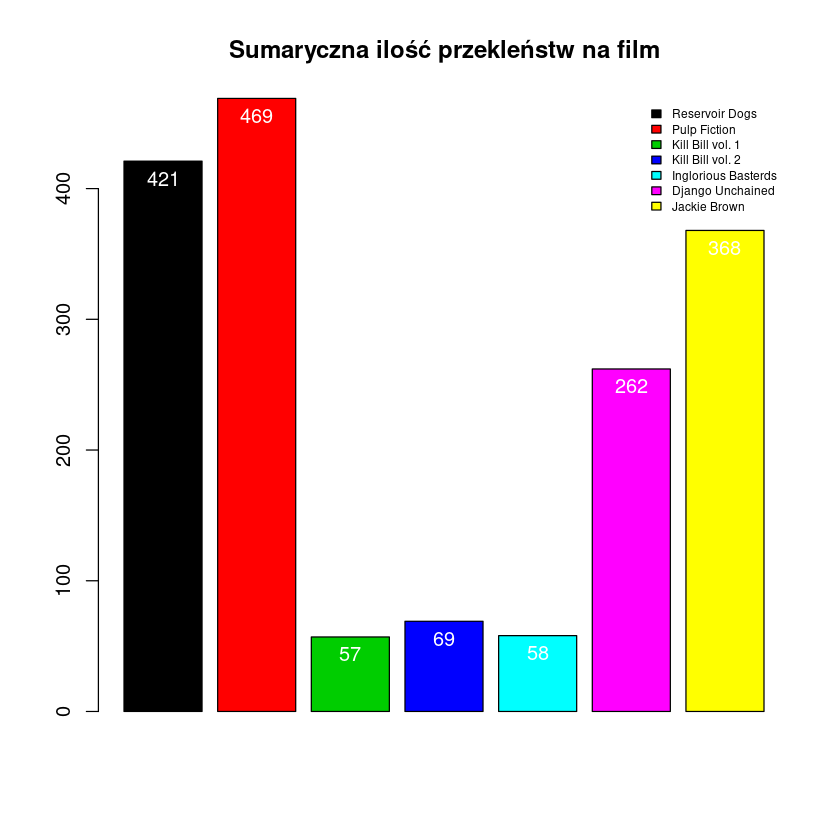

In [18]:
#rysowanie wykresu za pomoca funkcji barplot
b_s_a_w <- barplot(
                sum_all_words,
                main = "Sumaryczna ilość przekleństw na film",
                col = palette()
)

#wypisanie wartosci kazdego slupka
text(b_s_a_w, sum_all_words, sum_all_words, 0.5, 1, col = "white")

#legenda
legend(
    "topright",
    c("Reservoir Dogs","Pulp Fiction","Kill Bill vol. 1","Kill Bill vol. 2",
                    "Inglorious Basterds", "Django Unchained","Jackie Brown"),
    cex=0.6, 
    bty="n",
    fill = palette()

)

Rysuje się z tego ciekawy wyniosek. Mimo że "Kill Bill vol. 1" jest najbardziej brutalnym filmem, liczba przekleństw w porównaniu do innych analizowanych tu dzieł jest prawie że znikoma. Poza tym, za średnią ilość przekleństw we wszystkich filmach odpowiadają głównie cztery skrajne wartości. Na przykładzie tego wykresu można więc pokazać, że średnia jest miarą nieodporną na dane wejściowe.

In [19]:
mean(sum_all_words)

[1] 243.4286

Wynosi ona aż 243, czyli ponad cztery razy więcej niż łączna ilość przekleństw chociażby w "Inglorious Basterds"!

Jak wygląda sytuacja w przypadku średniej ilości śmierci?

In [20]:
c_d <- function (data, key)
    {
    counter <- 0
    for (row in 1:nrow(data))
        {
        if (data[row, key] == "death")
            {
            counter <- counter + 1
        }
    }
    return(counter)
}

In [21]:
#pomocnicza zmienna do wykresu
sum_all_deaths <- c(c_d(MyData[1:431,],2),
                    c_d(MyData[432:907,],2),
                    c_d(MyData[908:1027,], 2),
                    c_d(MyData[1028:1107,],2),
                    c_d(MyData[1108:1213,], 2),
                    c_d(MyData[1214:1522,],2),
                    c_d(MyData[1523:1894,], 2))

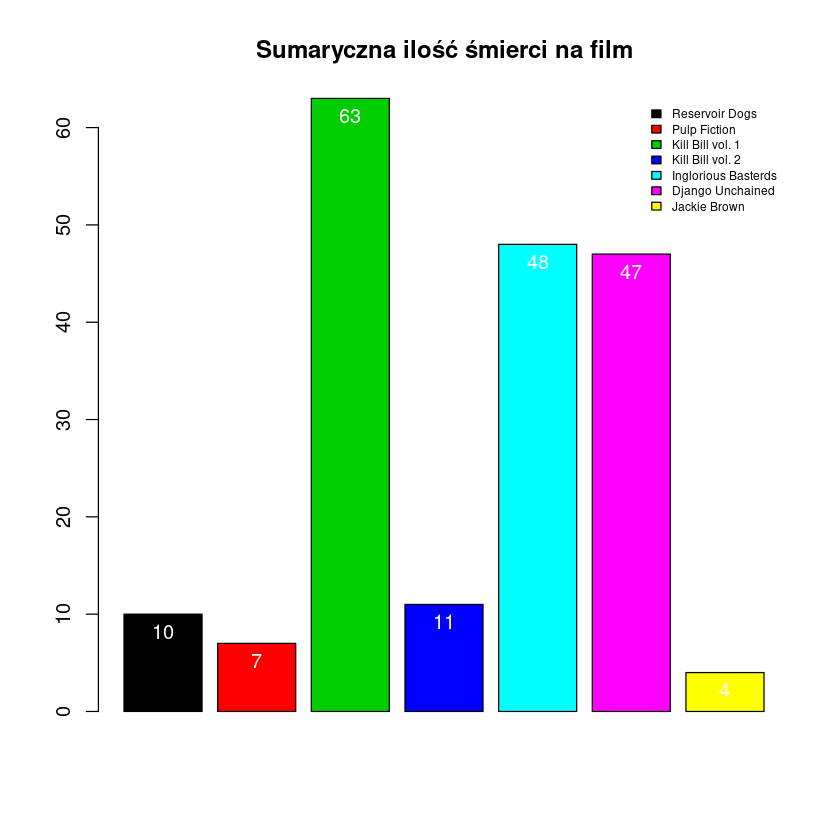

In [22]:
b_s_a_d <- barplot(
    sum_all_deaths,
               main = "Sumaryczna ilość śmierci na film",
               col = palette()
       )

text(b_s_a_d, sum_all_deaths, sum_all_deaths, 0.5, 1, col = "white")

legend(
    "topright",
    c("Reservoir Dogs","Pulp Fiction","Kill Bill vol. 1","Kill Bill vol. 2",
                    "Inglorious Basterds", "Django Unchained","Jackie Brown"),
    cex=0.6, 
    bty="n",
    fill = palette()
)

Tym razem jeszcze bardziej widać to, jak kiepską miarą jest tutaj średnia. Za jej wysokie wartości odpowiadają zaledwie trzy słupki, które przedstawiają "Kill Bill vol. 2"- czyli najbardziej brutalny z filmów, "Inglorious Baserds" oraz "Django Unchained".

In [23]:
mean(sum_all_deaths)

[1] 27.14286

Średnia ilość śmierci, przypadająca na film jest więc niemal siedem razy wyższa od najniższej z wartości, która wynosi 4 i należy do "Jackie Brown" - jak się okazuje, najbardziej delikatnego filmu Tarantino (przynajmniej w kwestii ilości ekranowych śmierci).

## Testowanie hipotezy

W 2009 roku przeprowadzono eksperyment, który miał zbadać typ, częstotliwość i użycie przekleństw w filmach dla nastolatków. Według tych badań, wśród rozważanych 90 filmów pojawiło się łącznie 2311 przypadków przekleństw. Czy bazując na tych badaniach moża stwierdzić, że wszystkie filmy Quentina Tarantino (nie tylko te, które tu podsumowano) są bardziej wulgarne od przedstawionej średniej? Przyjmuję, że moje dane mają rozkład normalny

źródło: "Swearing In The Cinema: An analysis of profanity in US teen-oriented movies, 1980-2006"

In [24]:
#na początku licze srednia z populacji
(main_mean <- 2311/90)

[1] 25.67778

In [25]:
#moje dane
hnumber <- 7 #ilosc filmow
hmean <- mean(sum_all_words) #srednia ilosc przeklenstw
hsd <- sd(sum_all_words) #odchylenie standardowe

In [26]:
#hipotezy
h0 <- (main_mean == hmean)
h1 <- (main_mean < hmean)

In [27]:
Ttest <- (hmean-main_mean)/(hsd/sqrt(hnumber))

In [28]:
#przyjety przedzial ufnosci
halpha <- 0.95

In [29]:
#sprawdzam t Distribiution Table
hT <- qt(halpha, hnumber-1)

In [30]:
hT < Ttest

[1] TRUE

In [31]:
#nie odrzucam h0.